In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [3]:
from sklearn.datasets import fetch_openml
credit_dataset = fetch_openml(name="credit-g", as_frame=True, version =1)

# Convert to Pandas DataFrame
df = pd.DataFrame(credit_dataset.data)
df.head(6)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,4,no known property,35,none,for free,1,unskilled resident,2,yes,yes


In [4]:
# Load the dataset, getting X (features) and y (target) separately
#return_X_y=True gives us X (features) and y (target) separately.
#as_frame=True ensures we get them as Pandas DataFrames,
X, y = fetch_openml(name='credit-g', version=1, return_X_y=True, as_frame=True)

In [5]:
# Combine X and y into a single DataFrame
df = pd.concat([X, y.rename('class')], axis=1)
df.head(5)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [7]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [8]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [9]:
df.isnull().sum().sum() ## Total number of missing values in the entire DataFrame

np.int64(0)

In [10]:
df.isna().sum() #no missing values

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [95]:
duplicates = df.duplicated() #check for duplicates

In [11]:
#drop unneeded columns
#i decided not to use "inplace = true" and pass it to a new variable 
new_df = df.drop(["checking_status", "savings_status", "employment","purpose", 
              "personal_status", "other_parties","residence_since", "property_magnitude", "other_payment_plans", "housing",
                 "job", "own_telephone", "foreign_worker", "age"], axis=1)

In [12]:
new_df.head()

,duration,credit_history,credit_amount,installment_commitment,existing_credits,num_dependents,class
0,6,critical/other existing credit,1169,4,2,1,good
1,48,existing paid,5951,2,1,1,bad
2,12,critical/other existing credit,2096,2,1,2,good
3,42,existing paid,7882,2,1,2,good
4,24,delayed previously,4870,3,2,2,bad


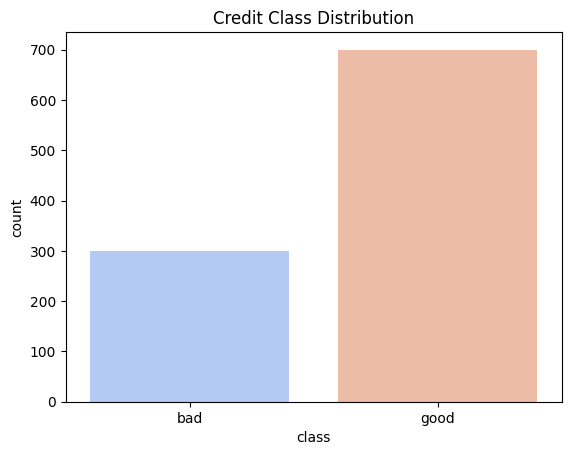

In [13]:
sns.countplot(x="class", data=new_df, palette="coolwarm")
plt.title("Credit Class Distribution")
plt.show()

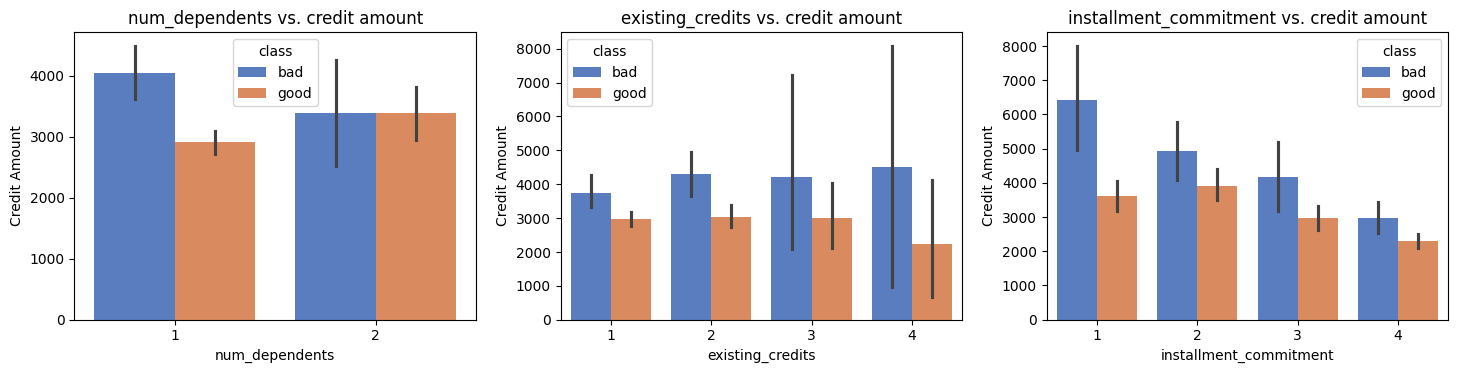

In [14]:

fig, axs = plt.subplots(1, 3, figsize=(15, 4))  
plt.tight_layout(pad=3) # Adjust layout for better spacing

# First plot: Duration vs Credit Amount
sns.barplot(ax=axs[0], x="num_dependents", y="credit_amount", hue="class", data=new_df, palette="muted")
axs[0].set_title("num_dependents vs. credit amount")
axs[0].set_xlabel("num_dependents")
axs[0].set_ylabel("Credit Amount")

# Second plot: Installment Commitment vs Credit Amount
sns.barplot(ax=axs[1], x="existing_credits", y="credit_amount", hue="class", data=new_df, palette="muted")
axs[1].set_title("existing_credits vs. credit amount")
axs[1].set_xlabel("existing_credits")
axs[1].set_ylabel("Credit Amount")

# Third plot: Dependents vs Credit Amount
sns.barplot(ax=axs[2], x="installment_commitment", y="credit_amount", hue="class", data=new_df, palette="muted")
axs[2].set_title("installment_commitment vs. credit amount")
axs[2].set_xlabel("installment_commitment")
axs[2].set_ylabel("Credit Amount")
plt.show()

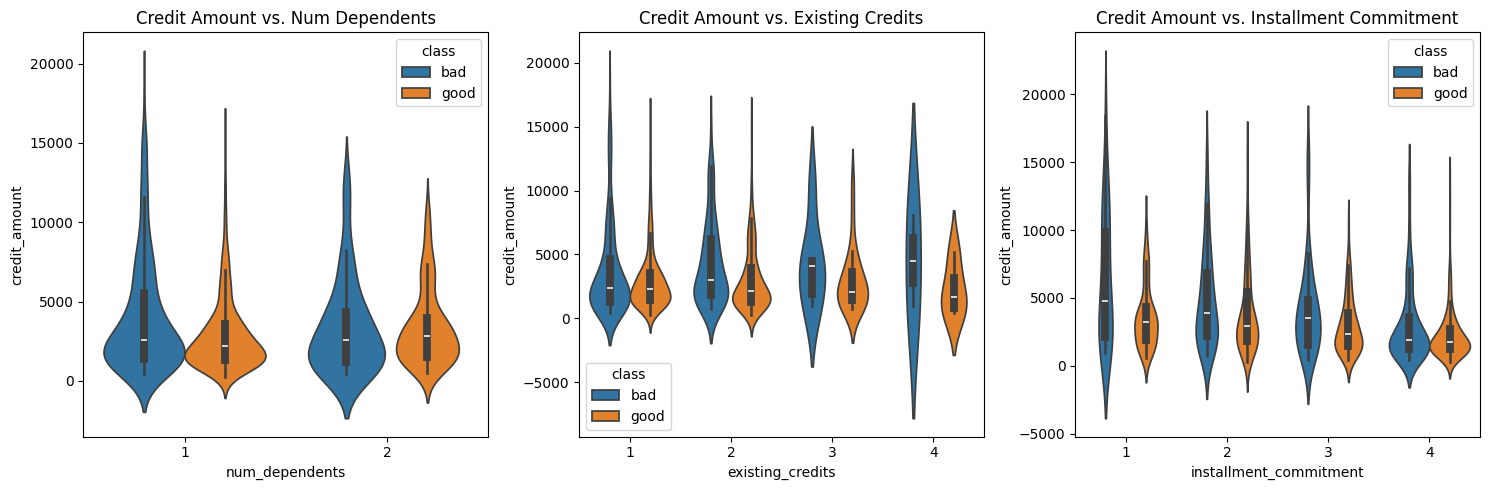

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(ax=axes[0], x='num_dependents', y='credit_amount', hue='class', data=new_df)
axes[0].set_title("Credit Amount vs. Num Dependents")

sns.violinplot(ax=axes[1], x='existing_credits', y='credit_amount', hue='class', data=new_df)
axes[1].set_title("Credit Amount vs. Existing Credits")

sns.violinplot(ax=axes[2], x='installment_commitment', y='credit_amount', hue='class', data=new_df)
axes[2].set_title("Credit Amount vs. Installment Commitment")


# Improve layout
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Credit Amount vs Duration')

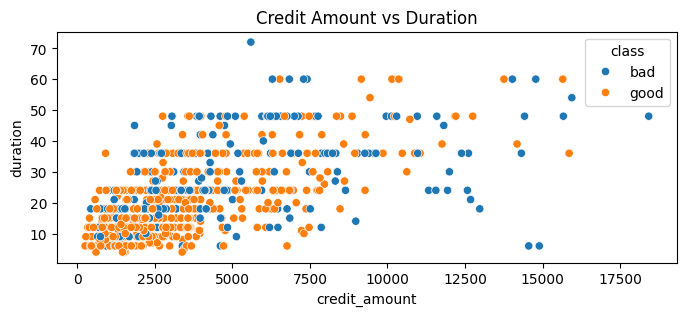

In [16]:
plt.figure(figsize=(8,3))
sns.scatterplot(data = new_df, x=df["credit_amount"], y=df["duration"], hue=df["class"])
plt.title("Credit Amount vs Duration")

<Axes: xlabel='class', ylabel='credit_amount'>

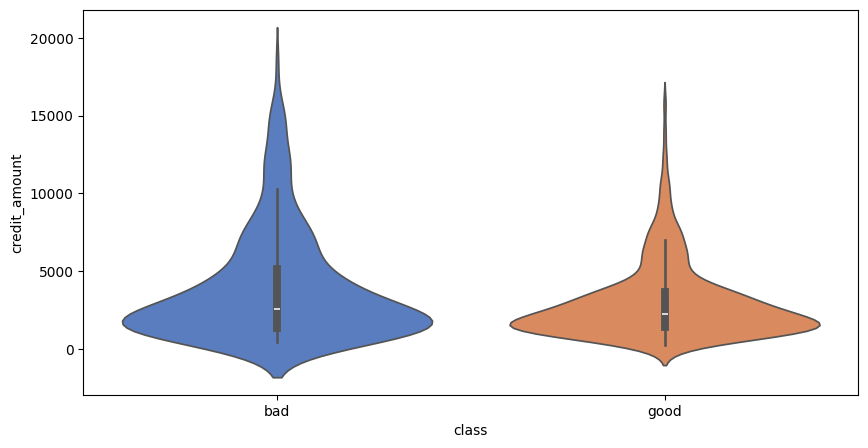

In [17]:
plt.figure(figsize=(10,5))
sns.violinplot(data = new_df, y=new_df["credit_amount"], x=new_df["class"],  palette='muted')

In [103]:
new_df

,duration,credit_history,credit_amount,installment_commitment,existing_credits,num_dependents,class
0,6,critical/other existing credit,1169,4,2,1,good
1,48,existing paid,5951,2,1,1,bad
2,12,critical/other existing credit,2096,2,1,2,good
3,42,existing paid,7882,2,1,2,good
4,24,delayed previously,4870,3,2,2,bad
...,...,...,...,...,...,...,...
995,12,existing paid,1736,3,1,1,good
996,30,existing paid,3857,4,1,1,good
997,12,existing paid,804,4,1,1,good
998,45,existing paid,1845,4,1,1,bad


In [104]:
credit_history_counts = new_df["credit_history"].value_counts()
credit_history_counts

credit_history
existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: count, dtype: int64

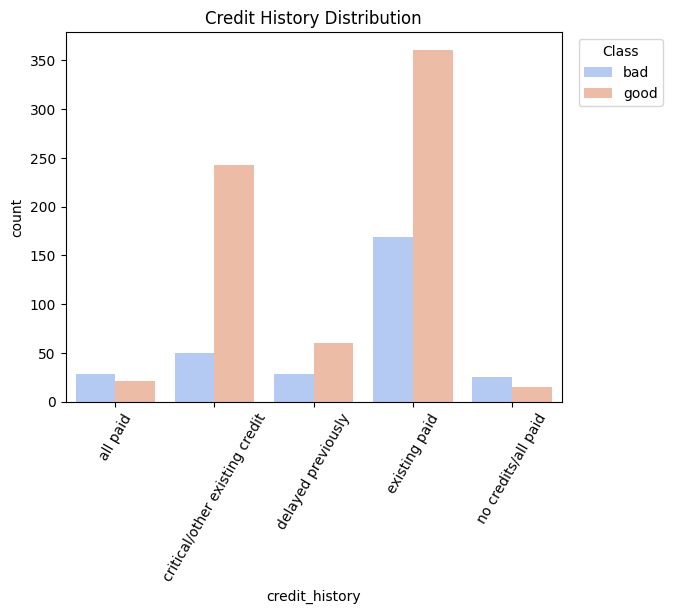

In [105]:
# Define class labels
#class_labels = {0: "Good", 1: "Bad"}

# Create the countplot with hue = class
ax = sns.countplot(x="credit_history", hue="class", data=new_df, palette="coolwarm") #hue_order=[0, 1])

# Get the handles and labels from the existing legend
handles, labels = ax.get_legend_handles_labels()

# Manually rename labels from 0/1 to "Good"/"Bad"
#labels = [class_labels[int(label)] for label in labels]

# Set the updated legend
plt.legend(handles=handles, labels=labels, title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")

# Improve x-axis readability
plt.xticks(rotation=60)
plt.title("Credit History Distribution")
plt.show()

In [106]:
new_df_1 = new_df.drop(["credit_history", "class" ], axis=1)
new_df_1

,duration,credit_amount,installment_commitment,existing_credits,num_dependents
0,6,1169,4,2,1
1,48,5951,2,1,1
2,12,2096,2,1,2
3,42,7882,2,1,2
4,24,4870,3,2,2
...,...,...,...,...,...
995,12,1736,3,1,1
996,30,3857,4,1,1
997,12,804,4,1,1
998,45,1845,4,1,1


<Axes: >

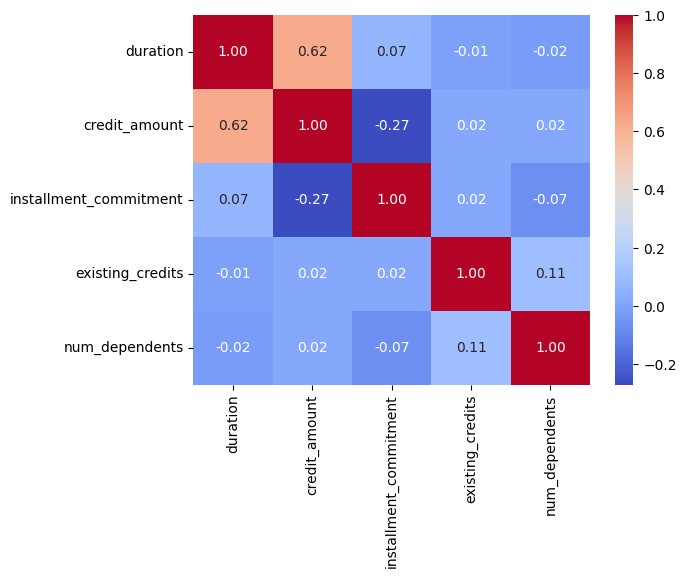

In [107]:
sns.heatmap(new_df_1.corr(), fmt= ".2f", annot = True, cmap = "coolwarm")

In [108]:
enc = LabelEncoder()
new_df.loc[:,'class'] = enc.fit_transform(new_df['class'])


In [109]:
new_df #label column encoded

,duration,credit_history,credit_amount,installment_commitment,existing_credits,num_dependents,class
0,6,critical/other existing credit,1169,4,2,1,1
1,48,existing paid,5951,2,1,1,0
2,12,critical/other existing credit,2096,2,1,2,1
3,42,existing paid,7882,2,1,2,1
4,24,delayed previously,4870,3,2,2,0
...,...,...,...,...,...,...,...
995,12,existing paid,1736,3,1,1,1
996,30,existing paid,3857,4,1,1,1
997,12,existing paid,804,4,1,1,1
998,45,existing paid,1845,4,1,1,0


In [19]:
#applying one hot encoding to credit_history column
encoded_credit_history = pd.get_dummies(new_df['credit_history'], dtype = int)

print(encoded_credit_history.head(10).to_string(index=False)) #prints all in one line 




 all paid  critical/other existing credit  delayed previously  existing paid  no credits/all paid
        0                               1                   0              0                    0
        0                               0                   0              1                    0
        0                               1                   0              0                    0
        0                               0                   0              1                    0
        0                               0                   1              0                    0
        0                               0                   0              1                    0
        0                               0                   0              1                    0
        0                               0                   0              1                    0
        0                               0                   0              1                    0
        0           

In [20]:
encoded_df = pd.concat([new_df, encoded_credit_history], axis=1)
print(encoded_df.head(10).to_string(index=False))

 duration                 credit_history  credit_amount  installment_commitment  existing_credits  num_dependents class  all paid  critical/other existing credit  delayed previously  existing paid  no credits/all paid
        6 critical/other existing credit           1169                       4                 2               1  good         0                               1                   0              0                    0
       48                  existing paid           5951                       2                 1               1   bad         0                               0                   0              1                    0
       12 critical/other existing credit           2096                       2                 1               2  good         0                               1                   0              0                    0
       42                  existing paid           7882                       2                 1               2  good         

In [21]:
new_encoded_df = encoded_df.drop("credit_history", axis=1, inplace=False)

In [22]:
new_encoded_df #dataframe ready to be scaled

,duration,credit_amount,installment_commitment,existing_credits,num_dependents,class,all paid,critical/other existing credit,delayed previously,existing paid,no credits/all paid
0,6,1169,4,2,1,good,0,1,0,0,0
1,48,5951,2,1,1,bad,0,0,0,1,0
2,12,2096,2,1,2,good,0,1,0,0,0
3,42,7882,2,1,2,good,0,0,0,1,0
4,24,4870,3,2,2,bad,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,1,1,good,0,0,0,1,0
996,30,3857,4,1,1,good,0,0,0,1,0
997,12,804,4,1,1,good,0,0,0,1,0
998,45,1845,4,1,1,bad,0,0,0,1,0


In [24]:
#split into X and y
X = new_encoded_df.drop("class", axis=1).values #features
y = new_encoded_df["class"].values #target


In [25]:
#scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
#split data into 80% training, 10% testing and 10% validation

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42,
                                                     shuffle = True)

In [27]:
#Further split X_temp and y_temp into 50% training and 50% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42,
                                                     shuffle = True)

In [118]:
for dataset in [X_train, X_val, X_test]: #
    print(dataset.shape)
   

(800, 10)
(100, 10)
(100, 10)


In [119]:
for dataset in [y_train, y_val, y_test]:
    print(dataset.shape)

(800,)
(100,)
(100,)


In [28]:
#Train the model
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)


KNeighborsClassifier()

In [37]:
#Evaluate the model on validation data

y_val_pred = KNN.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("classification_report:\n", classification_report(y_val, y_val_pred))
print("confusion_matrix:\n", confusion_matrix(y_val, y_val_pred))
print(f"Validation accuracy:\n {val_accuracy:.2f}")

classification_report:
               precision    recall  f1-score   support

         bad       0.60      0.48      0.54        31
        good       0.79      0.86      0.82        69

    accuracy                           0.74       100
   macro avg       0.69      0.67      0.68       100
weighted avg       0.73      0.74      0.73       100

confusion_matrix:
 [[15 16]
 [10 59]]
Validation accuracy:
 0.74


In [41]:
#Evaluate the model on test data
y_test_pred = KNN.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("classification_report:\n", classification_report(y_test, y_test_pred))
print(f"Test accuracy: {test_accuracy:.2f}")

classification_report:
               precision    recall  f1-score   support

         bad       0.45      0.36      0.40        28
        good       0.77      0.83      0.80        72

    accuracy                           0.70       100
   macro avg       0.61      0.60      0.60       100
weighted avg       0.68      0.70      0.69       100

Test accuracy: 0.70


In [40]:
#confusion matrix

confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

[[10 18]
 [12 60]]


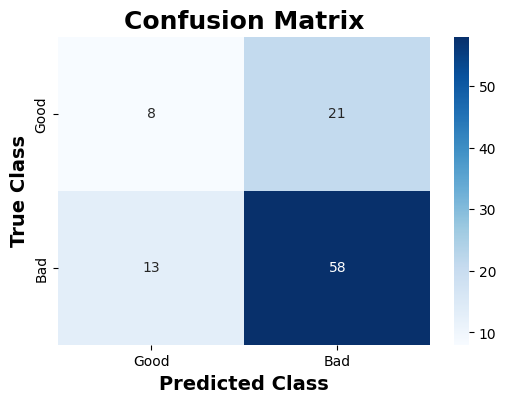

In [124]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Good', 'Bad'], yticklabels=['Good', 'Bad'])
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
plt.xlabel('Predicted Class', fontsize=14, fontweight='bold')
plt.ylabel('True Class', fontsize=14, fontweight='bold')
plt.show()

In [42]:
#confusion report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         bad       0.45      0.36      0.40        28
        good       0.77      0.83      0.80        72

    accuracy                           0.70       100
   macro avg       0.61      0.60      0.60       100
weighted avg       0.68      0.70      0.69       100



In [130]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

In [131]:
print("True Positives:",tp)
print("True Negatives:", tn)

True Positives: 58
True Negatives: 8


True Negative (Top-Left Quadrant)
False Positive (Top-Right Quadrant)
False Negative (Bottom-Left Quadrant)
True Positive (Bottom-Right Quadrant)

True Positive (TP): The model correctly predicted a positive outcome (the actual outcome was positive).
True Negative (TN): The model correctly predicted a negative outcome (the actual outcome was negative).
False Positive (FP): The model incorrectly predicted a positive outcome (the actual outcome was negative). Also known as a Type I error.
False Negative (FN): The model incorrectly predicted a negative outcome (the actual outcome was positive). Also known as a Type II error.

In [43]:
#optimize KNN model
err_rate = []
accuracy = []

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_val)

    
    err_rate.append(np.mean(pred_i != y_val))
    accuracy.append(np.mean(pred_i == y_val))

In [ ]:
err_rate

In [45]:
np.array(err_rate)

array([0.39, 0.44, 0.3 , 0.31, 0.26, 0.26, 0.26, 0.25, 0.26, 0.28, 0.26,
       0.29, 0.27, 0.27, 0.27, 0.26, 0.23, 0.25, 0.25, 0.26, 0.26, 0.26,
       0.25, 0.25, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24, 0.24,
       0.24, 0.24, 0.24, 0.24, 0.24, 0.25, 0.25, 0.26, 0.24, 0.26, 0.25,
       0.25, 0.25, 0.24, 0.24, 0.28, 0.27, 0.29, 0.29, 0.28, 0.28, 0.28,
       0.28, 0.28, 0.28, 0.3 , 0.29, 0.3 , 0.29, 0.29, 0.29, 0.31, 0.3 ,
       0.31, 0.3 , 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31,
       0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31,
       0.31, 0.3 , 0.32, 0.31, 0.31, 0.3 , 0.3 , 0.3 , 0.31, 0.3 , 0.31])

In [44]:
min_err = min(err_rate)
print(min_err)


0.23


In [46]:
len(err_rate)

99

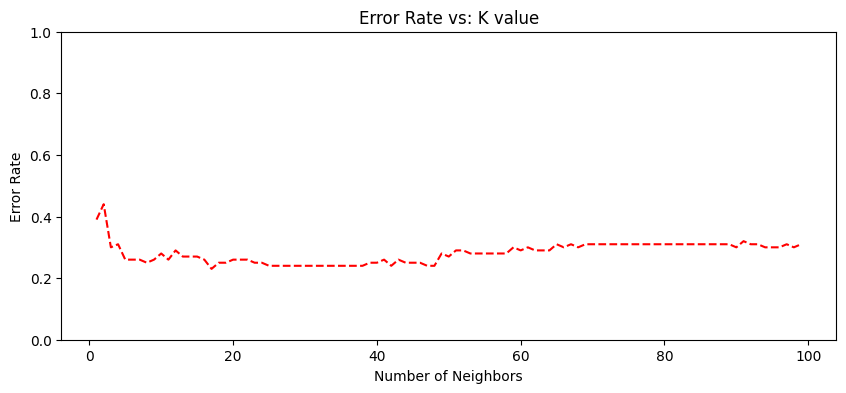

In [47]:
plt.figure(figsize = (10,4))

plt.plot(range(1, 100), err_rate, color='red', linestyle='dashed', 
         markerfacecolor='blue', markersize=10)
plt.ylim(0, 1.0)
plt.title("Error Rate vs: K value")
plt.xlabel("Number of Neighbors")
plt.ylabel("Error Rate")

plt.show()

In [52]:
best_knn = err_rate.index(min_err)
print(best_knn)

16


In [53]:
#best knn model
knn = KNeighborsClassifier(n_neighbors =best_knn)
best_knn_model=knn.fit(X_train, y_train)
best_prediction = best_knn_model.predict(X_test)

best_knn_model.score(X_test, y_test)




0.72